In [1]:
import tensorflow as tf
import keras 
import glob

In [2]:
#pip install keras
print(tf.__version__)

1.15.0


In [3]:
import librosa
import warnings
warnings.filterwarnings("ignore")

In [4]:
import matplotlib.pyplot as plt

In [5]:
import warnings

In [6]:
warnings.filterwarnings("ignore")

In [7]:
%matplotlib inline

In [8]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [9]:
import os

In [10]:
import pandas as pd

In [11]:
import librosa.display

In [12]:
import glob

In [13]:
%config InlineBackend.figure_format= 'retina'

In [14]:
INOUT_DIR="pwd"

In [15]:
SAMPLE_RATE=16000
MAX_SOUND_CLIP_DURATION=12

In [16]:
set_a=pd.read_csv("datasets_453_923_set_a.csv")

In [17]:
set_a.head()

dataset                             fname     label  sublabel
0       a  set_a/artifact__201012172012.wav  artifact       NaN
1       a  set_a/artifact__201105040918.wav  artifact       NaN
2       a  set_a/artifact__201105041959.wav  artifact       NaN
3       a  set_a/artifact__201105051017.wav  artifact       NaN
4       a  set_a/artifact__201105060108.wav  artifact       NaN

In [18]:
set_a.tail()

dataset                     fname label  sublabel
171       a  set_a/__201108222241.wav   NaN       NaN
172       a  set_a/__201108222244.wav   NaN       NaN
173       a  set_a/__201108222247.wav   NaN       NaN
174       a  set_a/__201108222254.wav   NaN       NaN
175       a  set_a/__201108222257.wav   NaN       NaN

In [19]:
set_a.describe()


sublabel
count       0.0
mean        NaN
std         NaN
min         NaN
25%         NaN
50%         NaN
75%         NaN
max         NaN

In [20]:
set_a_timing=pd.read_csv("datasets_453_923_set_a_timing.csv")

In [21]:
set_a_timing.head()

fname  cycle sound  location
0  set_a/normal__201102081321.wav      1    S1     10021
1  set_a/normal__201102081321.wav      1    S2     20759
2  set_a/normal__201102081321.wav      2    S1     35075
3  set_a/normal__201102081321.wav      2    S2     47244
4  set_a/normal__201102081321.wav      3    S1     62992

In [22]:
set_b=pd.read_csv('datasets_453_923_set_b.csv')

In [23]:
set_b.head()

dataset                                              fname       label  \
0       b  set_b/Btraining_extrastole_127_1306764300147_C...  extrastole   
1       b  set_b/Btraining_extrastole_128_1306344005749_A...  extrastole   
2       b  set_b/Btraining_extrastole_130_1306347376079_D...  extrastole   
3       b  set_b/Btraining_extrastole_134_1306428161797_C...  extrastole   
4       b  set_b/Btraining_extrastole_138_1306762146980_B...  extrastole   

  sublabel  
0      NaN  
1      NaN  
2      NaN  
3      NaN  
4      NaN

In [24]:
frames = [set_a ,set_b]

In [25]:
train_ab=pd.concat(frames)

In [26]:
train_ab.describe()

dataset                           fname   label     sublabel
count      832                             832     585          149
unique       2                             832       5            2
top          b  set_a/normal__201103140132.wav  normal  noisynormal
freq       656                               1     351          120

In [27]:
nb_classes=train_ab.label.unique()


In [28]:
print("Number of training examples=",train_ab.shape[0])

Number of training examples= 832


In [29]:
print("Number of classes=",len(train_ab.label.unique()))

Number of classes= 6


In [30]:
print(nb_classes)

['artifact' 'extrahls' 'murmur' 'normal' nan 'extrastole']


In [31]:
#visualize data distribution by category

In [32]:
category_group = train_ab.groupby(['label','dataset']).count()

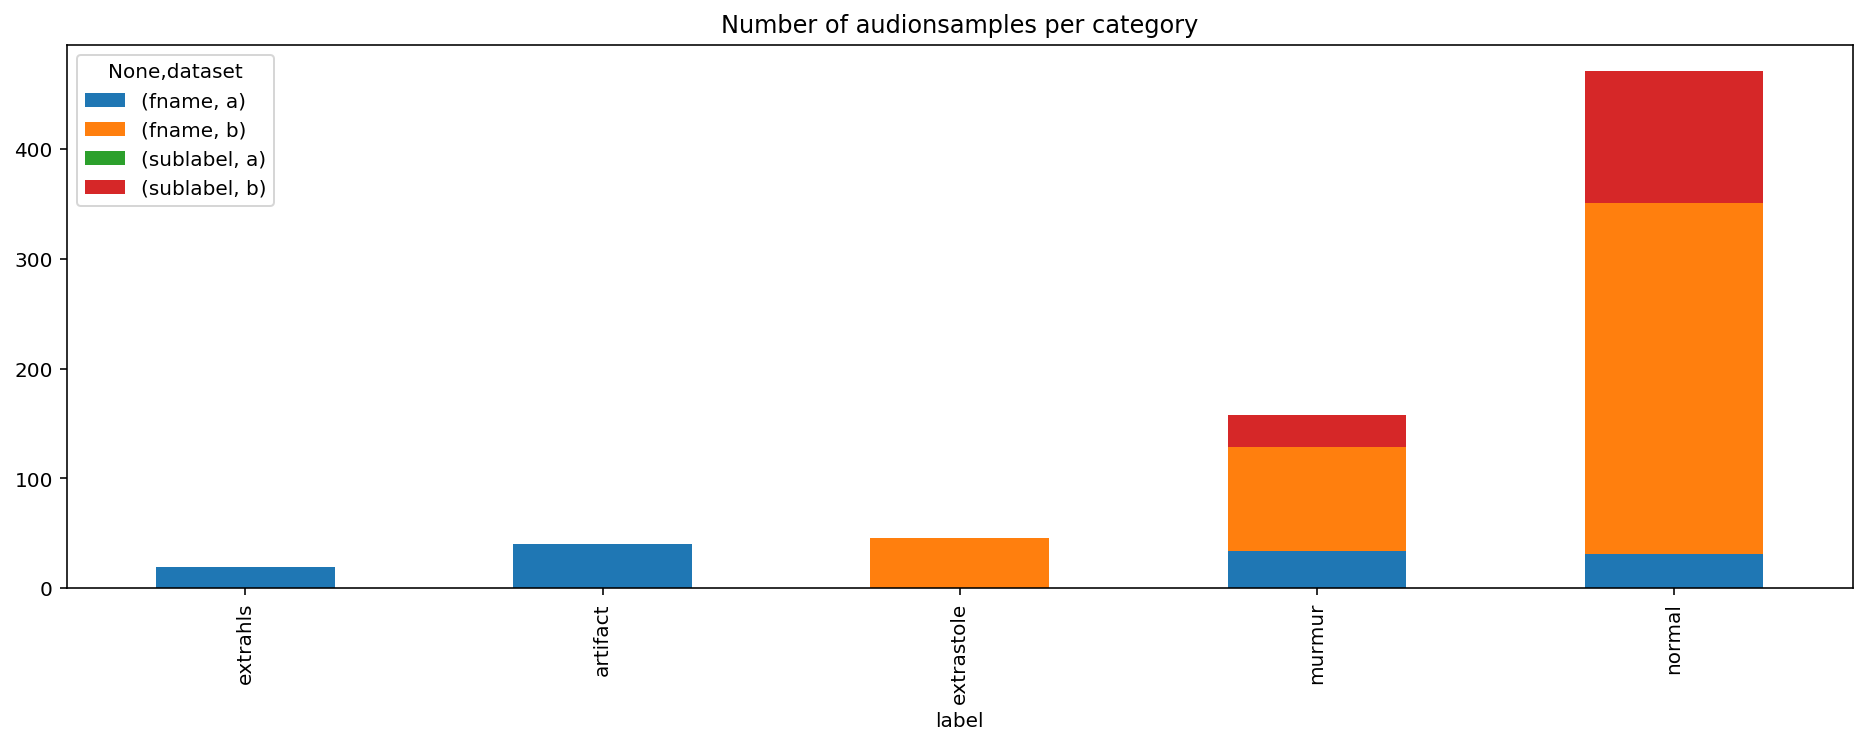

In [33]:
plot=category_group.unstack().reindex(category_group.unstack().sum(axis=1).sort_values().index).plot(kind="bar",stacked=True,title="Number of audionsamples per category",figsize=(16,5))

In [34]:
plot.set_xlabel("category")
plot.set_ylabel("Sample count");

In [35]:
print("Min samples per category=",min(train_ab.label.value_counts()))
print("Max samples per category=",max(train_ab.label.value_counts()))

Min samples per category= 19
Max samples per category= 351


In [36]:
normal_file='set_a/normal__201106141148.wav'

In [37]:
import IPython.display as ipd

In [38]:
ipd.Audio(normal_file)

In [39]:
import wave

In [40]:
wav=wave.open(normal_file)

In [41]:
print("Sampling(frame) rate=",wav.getframerate())
print("Total samples(frames)=",wav.getnframes())
print("Duration=",wav.getnframes()/wav.getframerate())

Sampling(frame) rate= 44100
Total samples(frames)= 253544
Duration= 5.749297052154195


In [42]:
from scipy.io import wavfile
rate , data =wavfile.read(normal_file)
print("Sampling(frame) rate =",rate)
print("Total samples (frames)=",data.shape)
print(data)

Sampling(frame) rate = 44100
Total samples (frames)= (253544,)
[-69 -57 -30 ... 439 477 442]


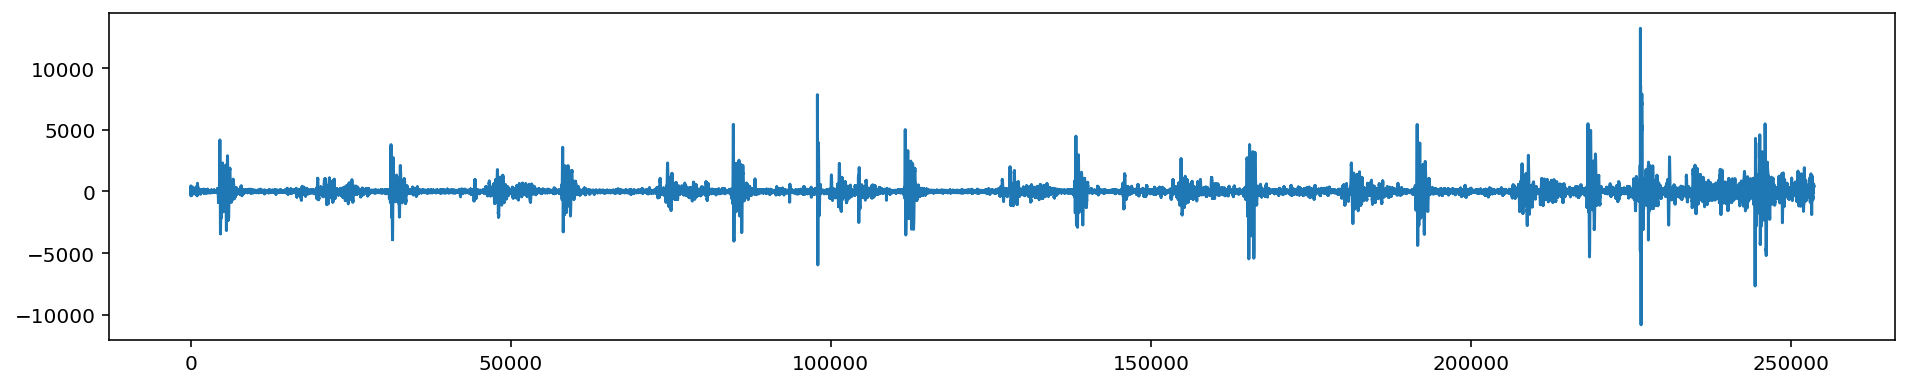

In [43]:
plt.figure(figsize=(16,3))
plt.plot(data,'-', );

In [44]:
y , sr=librosa.load(normal_file,duration=5)
dur=librosa.get_duration(y)
print("duration:",dur)
print(y.shape,sr)

duration: 5.0
(110250,) 22050


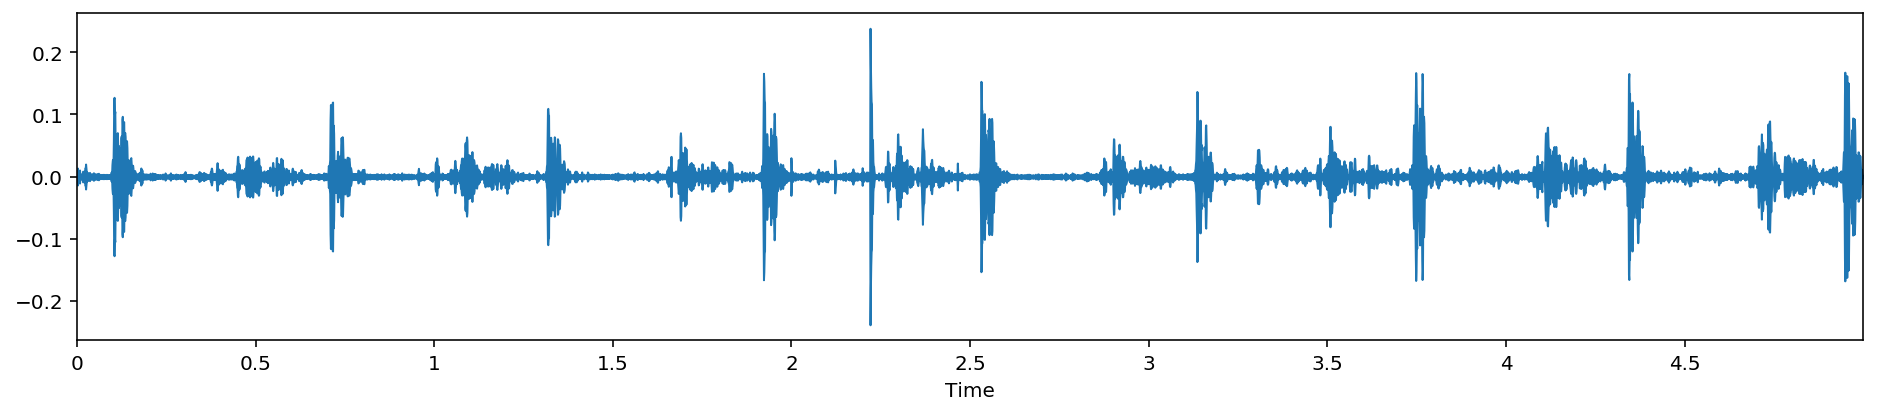

In [45]:
plt.figure(figsize=(16,3))
librosa.display.waveplot(y,sr=sr)

In [46]:
murmur_file='set_a/murmur__201101051108.wav'

In [47]:
y2 , sr2 = librosa.load(murmur_file,duration=5)
dur=librosa.get_duration(y)
print("duration:",dur)
print(y2.shape,sr2)

duration: 5.0
(110250,) 22050


In [48]:
import IPython.display as ipd
ipd.Audio(murmur_file)

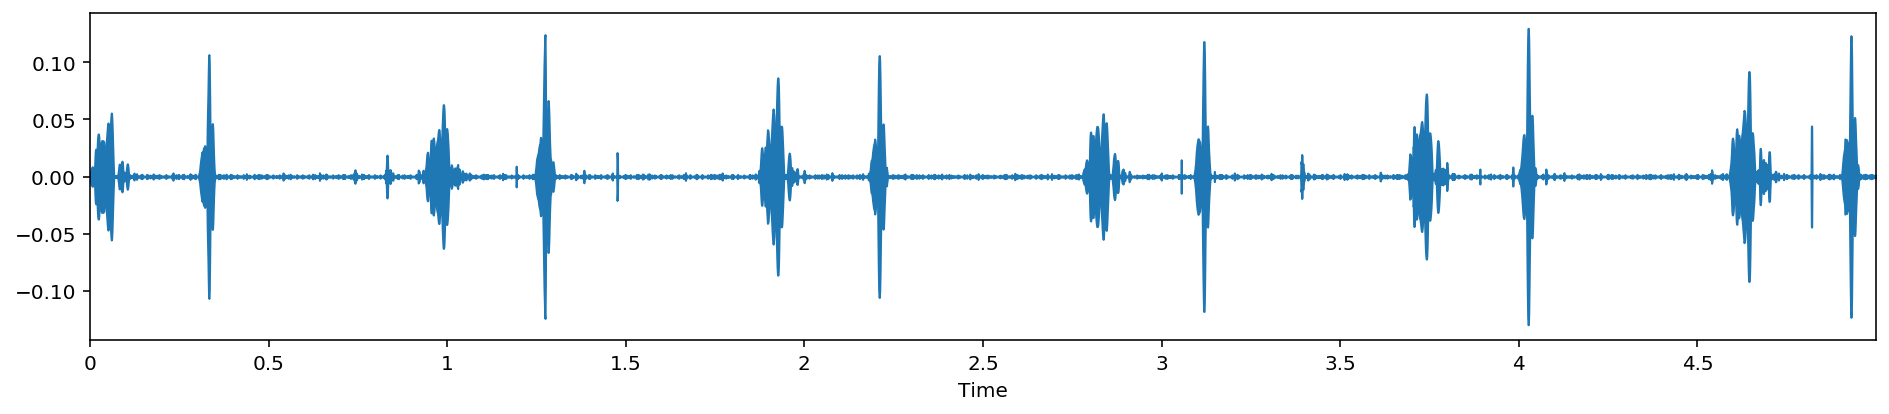

In [49]:
plt.figure(figsize=(16,3))
librosa.display.waveplot(y2,sr=sr2)

In [50]:
extrastole_file='set_b/extrastole__198_1308141739338_B.wav'

In [51]:
y3 ,sr3=librosa.load(extrastole_file,duration=5)
dur=librosa.get_duration(y)
print("duration:",dur)
print(y3.shape,sr3)

duration: 5.0
(110250,) 22050


In [52]:
import IPython.display as ipd
ipd.Audio(extrastole_file)

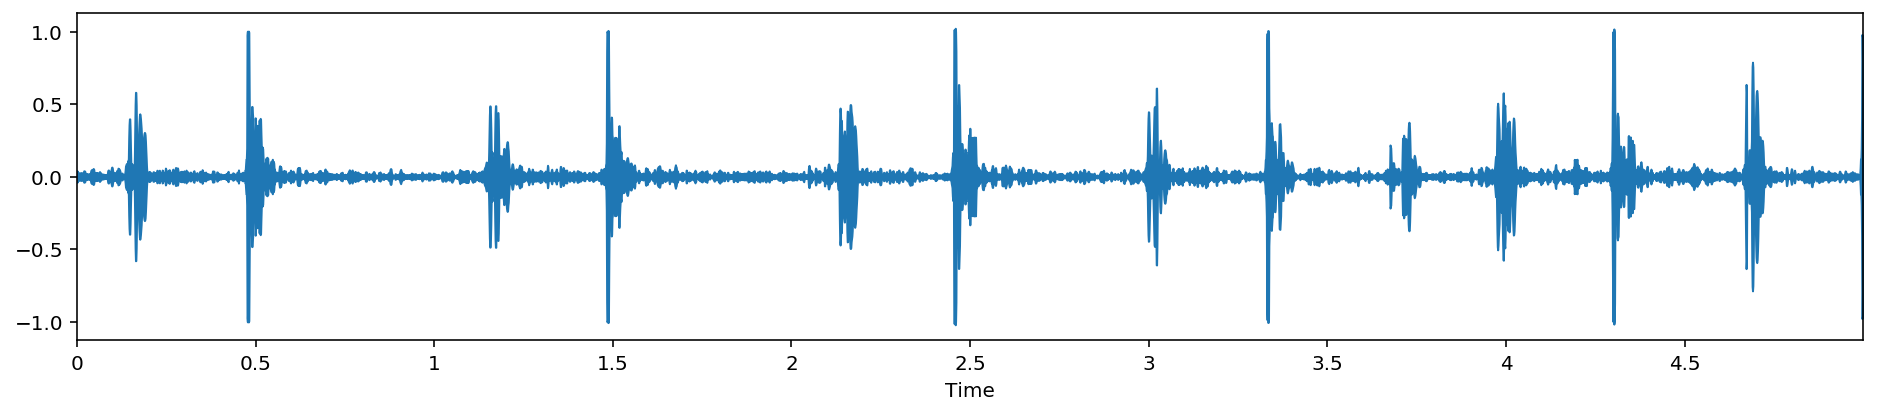

In [53]:
plt.figure(figsize=(16,3))
librosa.display.waveplot(y3,sr=sr3)

In [54]:
artifact_file="set_a/artifact__201106211041.wav"

In [55]:
y4, sr4 =librosa.load(artifact_file,duration=5)
dur=librosa.get_duration(y)
print("duration:",dur)
print(y4.shape,sr4)

duration: 5.0
(110250,) 22050


In [56]:
import IPython.display as ipd
ipd.Audio(artifact_file)

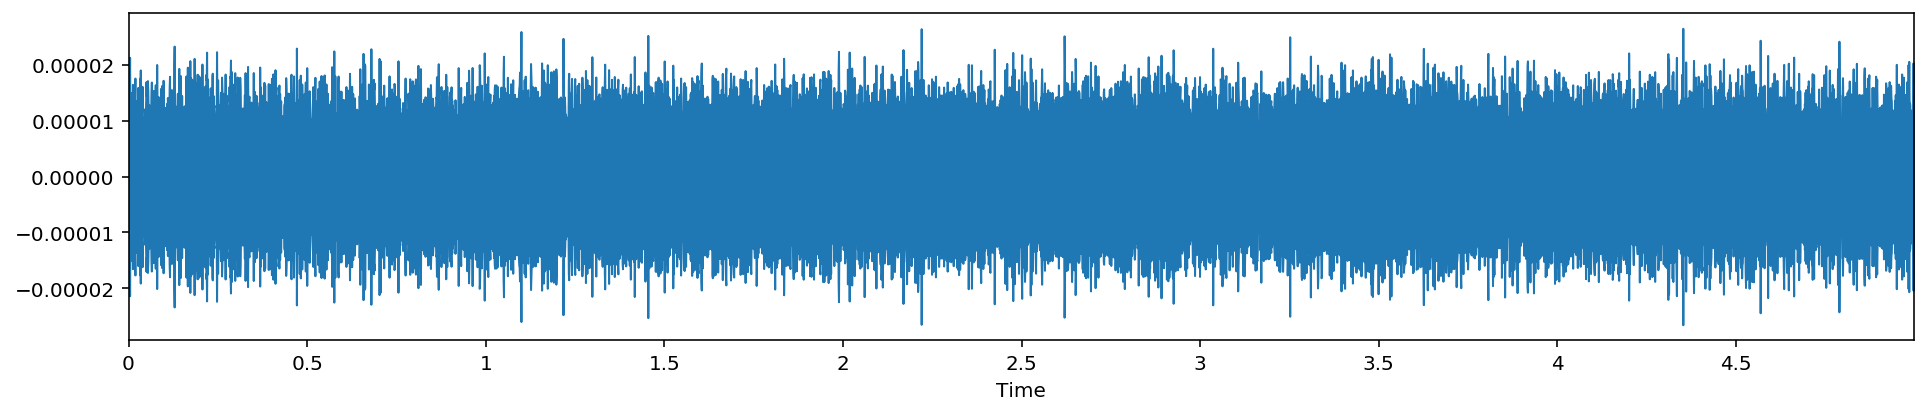

In [57]:
plt.figure(figsize=(16,3))
librosa.display.waveplot(y4,sr=sr4)

In [58]:
extrahls_file='set_a/extrahls__201101241433.wav'
y5,sr5 = librosa.load(extrahls_file,duration=5)
dur = librosa.get_duration(y)
print("duration:",dur)
print(y5.shape,sr5)

duration: 5.0
(110250,) 22050


In [59]:
import IPython.display as ipd
ipd.Audio(extrahls_file)

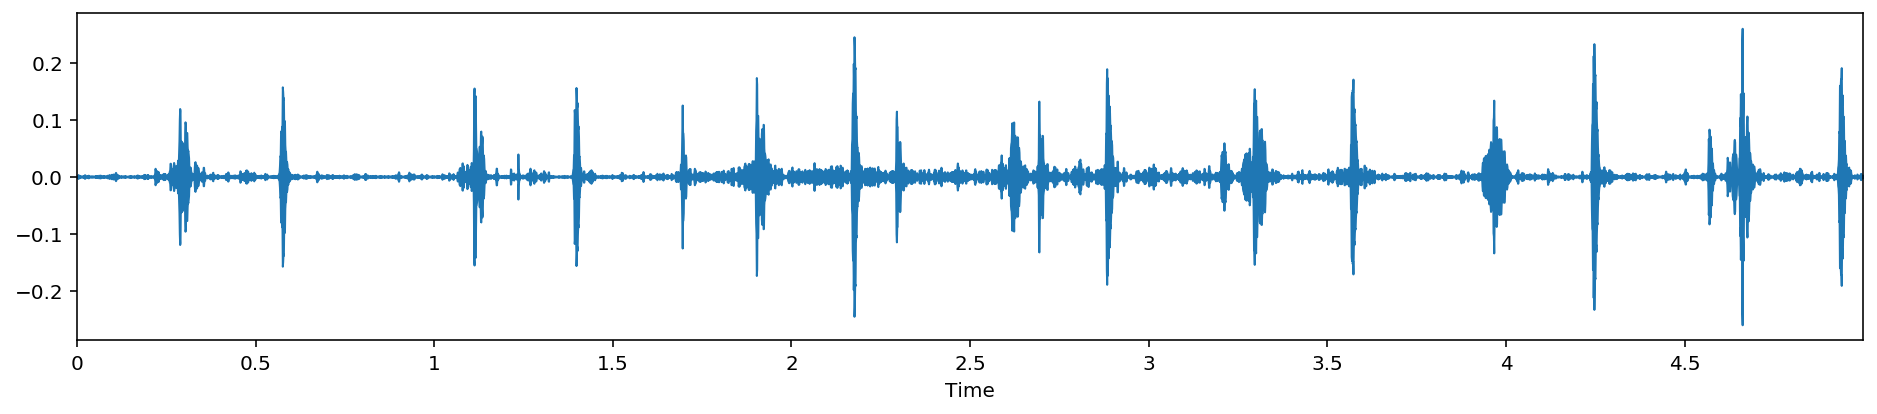

In [60]:
plt.figure(figsize=(16,3))
librosa.display.waveplot(y5,sr=sr5)

In [61]:
normal_file='set_a/normal__201105151450.wav'

In [62]:
y, sr =librosa.load(normal_file)
mfccs = librosa.feature.mfcc(y=y , sr=sr)

In [63]:
print(mfccs)

[[-3.99966187e+02 -3.20325958e+02 -3.27155884e+02 ... -4.66484955e+02
  -4.68955902e+02 -4.87497711e+02]
 [ 8.59492340e+01  8.85348969e+01  9.41270599e+01 ...  9.82446594e+01
   8.94221802e+01  6.91875000e+01]
 [-4.29549408e+01 -6.33449249e+01 -6.04318275e+01 ...  1.55100155e+01
  -2.02503395e+00 -1.32248993e+01]
 ...
 [-1.23713455e+01 -6.29462910e+00 -5.57224941e+00 ... -3.57658362e+00
   9.14581418e-02  4.06654549e+00]
 [-1.27461615e+01 -1.66883106e+01 -1.74411659e+01 ... -6.20823383e+00
  -2.20179439e+00 -4.53656340e+00]
 [ 1.24981575e+01  1.36196537e+01  1.22003260e+01 ... -1.94423175e+00
  -4.42951584e+00 -5.35582590e+00]]


In [64]:
S = librosa.feature.melspectrogram(y=y , sr=sr, n_mels=128,fmax=8000)
log_S=librosa.feature.mfcc(S=librosa.power_to_db(S))
print(log_S)

[[-380.04327    -295.32166    -301.61572    ... -451.15808
  -453.49515    -473.98077   ]
 [  64.83528      59.0066       64.66084    ...   89.49215
    78.51562      57.28885   ]
 [ -37.44722     -52.10633     -49.135025   ...   20.102217
     0.58230555  -10.548878  ]
 ...
 [   8.227149      6.365269      4.214409   ...   -5.2032027
    -5.6565094    -6.8781137 ]
 [  10.088077     11.503905     10.804676   ...   -4.017598
    -8.30942     -12.1451    ]
 [ -10.042944    -14.068553    -14.797148   ...   -2.2793338
    -1.9952374    -0.5546315 ]]


In [65]:
mfccs = librosa.feature.mfcc(y=y,sr=sr , n_mfcc=40)
print(mfccs)

[[-3.99966187e+02 -3.20325958e+02 -3.27155884e+02 ... -4.66484955e+02
  -4.68955902e+02 -4.87497711e+02]
 [ 8.59492340e+01  8.85348969e+01  9.41270599e+01 ...  9.82446594e+01
   8.94221802e+01  6.91875000e+01]
 [-4.29549408e+01 -6.33449249e+01 -6.04318275e+01 ...  1.55100155e+01
  -2.02503395e+00 -1.32248993e+01]
 ...
 [ 3.91203165e-01  3.27182579e+00  3.95624924e+00 ...  1.71413779e+00
   3.88819873e-01 -1.10282087e+00]
 [-1.44161201e+00  1.19276178e+00  1.37224197e+00 ... -3.55091715e+00
  -1.06487226e+00 -2.21940517e+00]
 [-1.81120551e+00 -3.89072478e-01  1.45176840e+00 ... -3.16708136e+00
  -1.33250833e-01 -3.40621281e+00]]


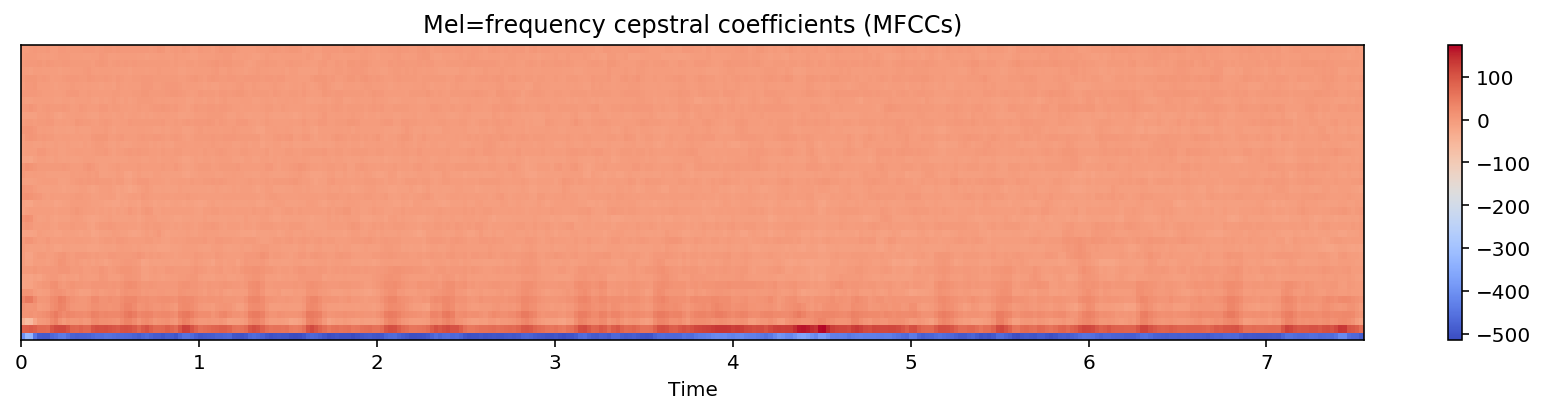

In [66]:
plt.figure(figsize=(12,3))
librosa.display.specshow(mfccs,x_axis='time')
plt.colorbar()
plt.title('Mel=frequency cepstral coefficients (MFCCs)')
plt.tight_layout()

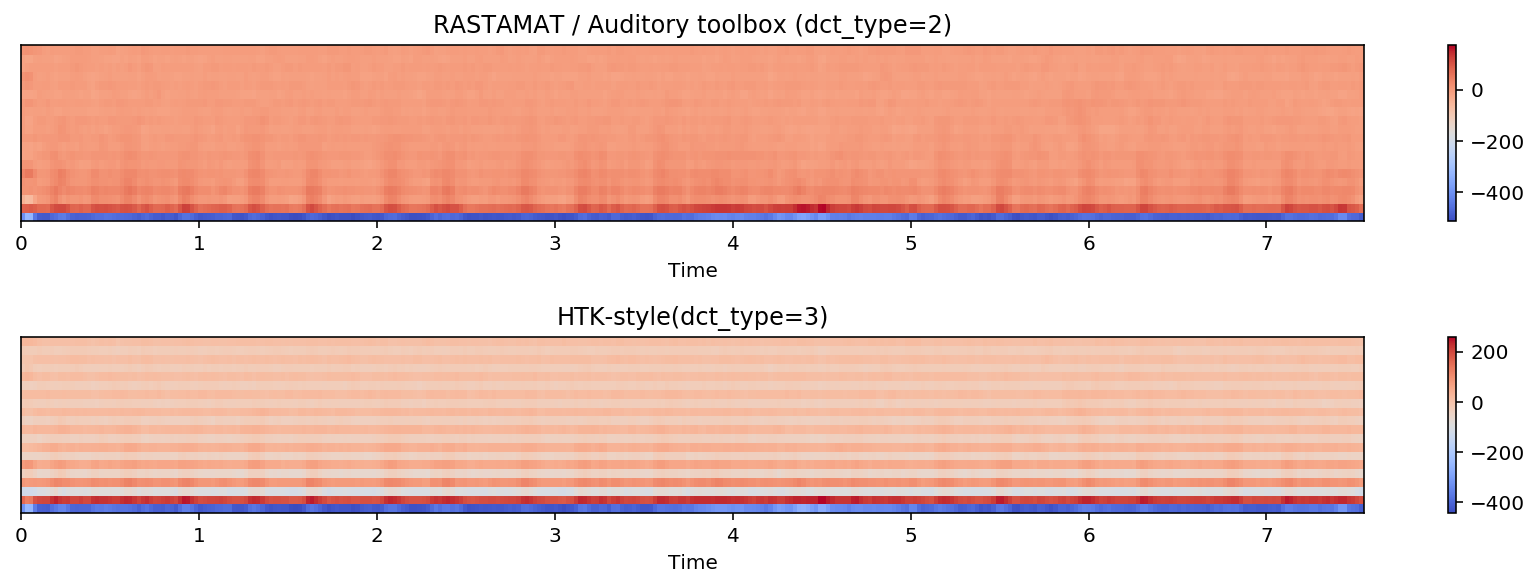

In [67]:
#compare different DCT bases
m_slaney = librosa.feature.mfcc(y=y , sr=sr , dct_type=2)
plt.figure(figsize=(12,6))
m_htk = librosa.feature.mfcc(y=y , sr=sr , dct_type=3)
plt.subplot(3,1,2)
librosa.display.specshow(m_slaney,x_axis='time')
plt.title('RASTAMAT / Auditory toolbox (dct_type=2)')
plt.colorbar()
plt.subplot(3,1,3)
librosa.display.specshow(m_htk,x_axis='time')
plt.title('HTK-style(dct_type=3)')
plt.colorbar()
plt.tight_layout()

In [68]:
onset_frames = librosa.onset.onset_detect(y=y , sr=sr)
librosa.frames_to_time(onset_frames,sr=sr)

array([0.06965986, 0.20897959, 0.2554195 , 0.44117914, 0.71981859,
       0.92879819, 1.32353741, 1.64861678, 2.08979592, 2.34521542,
       2.41487528, 2.48453515, 2.85605442, 3.15791383, 3.29723356,
       3.36689342, 3.59909297, 3.76163265, 4.2492517 , 4.38857143,
       4.52789116, 4.71365079, 5.03873016, 5.17804989, 5.50312925,
       5.66566893, 5.75854875, 5.87464853, 5.9907483 , 6.31582766,
       7.12852608, 7.43038549])

In [69]:
o_env=librosa.onset.onset_strength(y,sr=sr)
times=librosa.frames_to_time(np.arange(len(o_env)),sr=sr)
onset_frames = librosa.onset.onset_detect(onset_envelope=o_env,sr=sr)

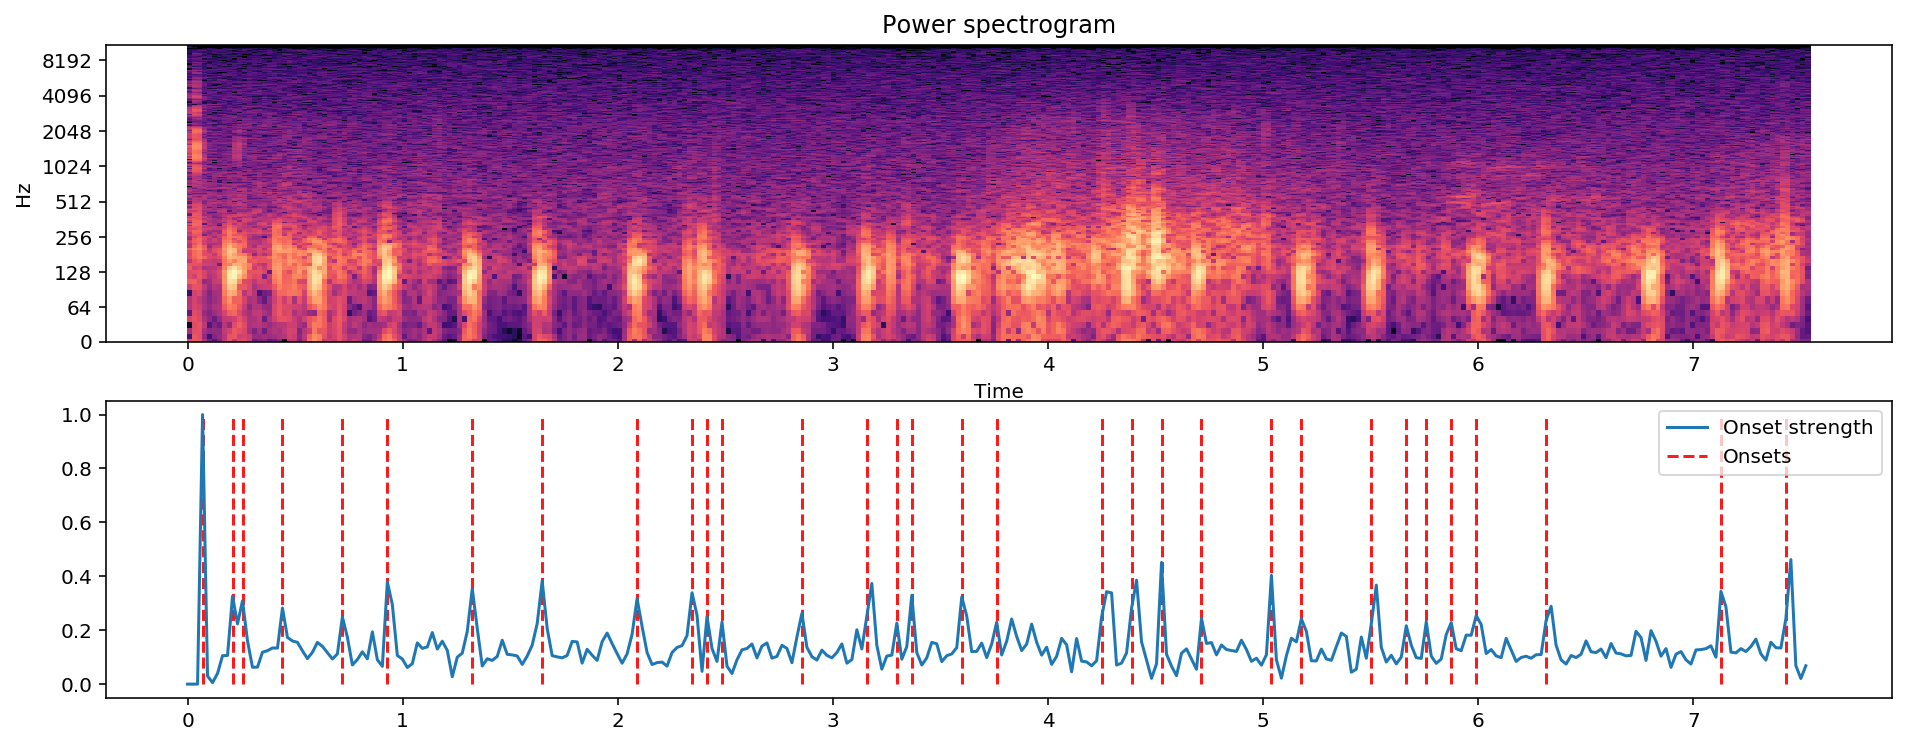

In [70]:
D=np.abs(librosa.stft(y))
plt.figure(figsize=(16,6))
ax1 = plt.subplot(2,1,1)
librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max),x_axis='time',y_axis='log')
plt.title('Power spectrogram')
plt.subplot(2,1,2,sharex=ax1)
plt.plot(times ,o_env,label='Onset strength')
plt.vlines(times[onset_frames],0,o_env.max(),color='r',alpha=0.9,linestyle="--",label='Onsets')
plt.axis('tight')
plt.legend(frameon=True,framealpha=0.75)

In [71]:
oenv = librosa.onset.onset_strength(y=y,sr=sr)
onset_raw = librosa.onset.onset_detect(onset_envelope=oenv,backtrack=False)
onset_bt=librosa.onset.onset_backtrack(onset_raw,oenv)
rms=librosa.feature.rms(S=np.abs(librosa.stft(y=y)))
onset_bt_rms=librosa.onset.onset_backtrack(onset_raw,rms[0])

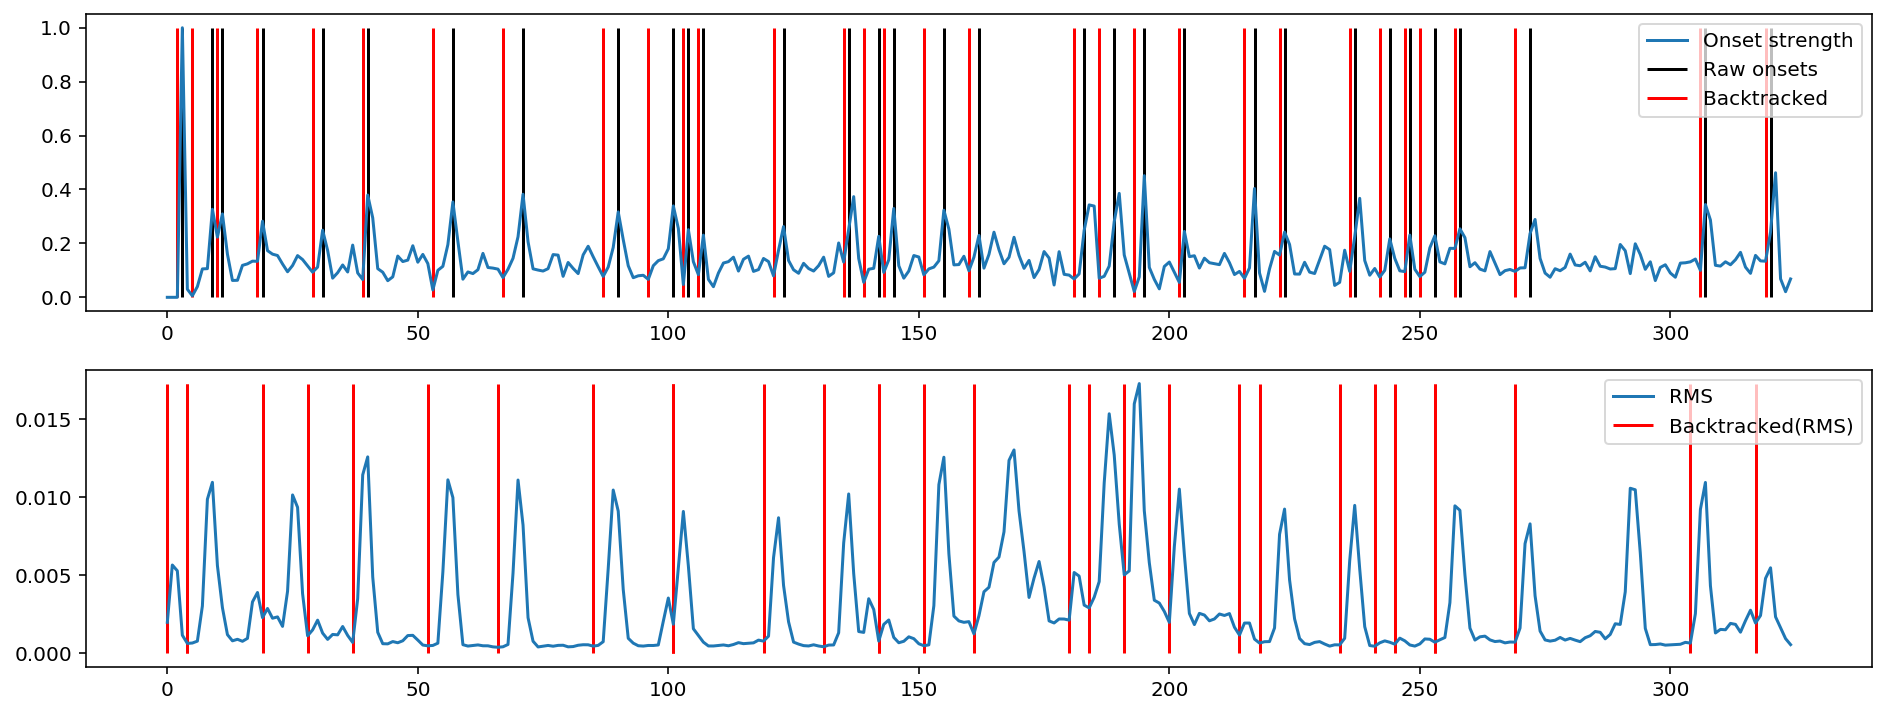

In [72]:
plt.figure(figsize=(16,6))
plt.subplot(2,1,1)
plt.plot(oenv,label="Onset strength")
plt.vlines(onset_raw,0,oenv.max(),label='Raw onsets')
plt.vlines(onset_bt,0,oenv.max(),label='Backtracked',color='r')
plt.legend(frameon=True,framealpha=0.75)
plt.subplot(2,1,2)
plt.plot(rms[0],label='RMS')
plt.vlines(onset_bt_rms,0,rms.max(),label='Backtracked(RMS)',color='r')
plt.legend(frameon=True,framealpha=0.75)

Text(0.5, 1.0, 'Sub-band onset strength')

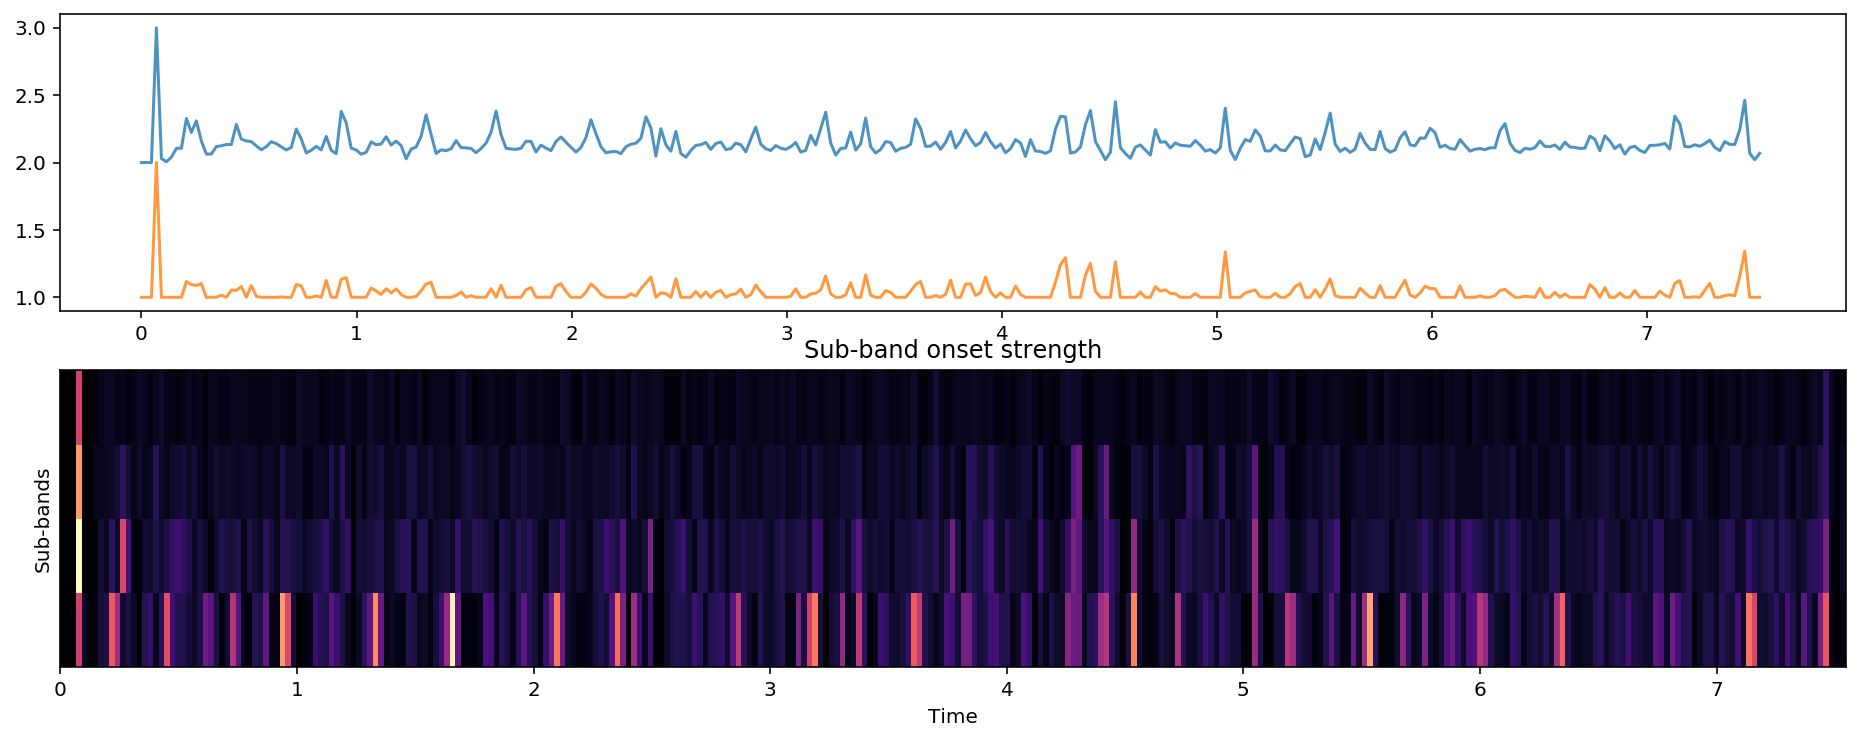

In [73]:
D=np.abs(librosa.stft(y))
times=librosa.frames_to_time(np.arange(D.shape[1]))
plt.figure(figsize(16,6))
onset_env = librosa.onset.onset_strength(y=y,sr=sr)
plt.subplot(2,1,1,sharex=ax1)
plt.plot(times,2+onset_env/onset_env.max(),alpha=0.8,label='Mean(mel)')
onset_env=librosa.onset.onset_strength(y=y,sr=sr,aggregate=np.median,fmax=8000,n_mels=256)
plt.plot(times,1+(onset_env/onset_env.max()),alpha=0.8,label='Median(custom mel)')
onset_subbands =librosa.onset.onset_strength_multi(y=y,sr=sr,channels=[0,32,64,96,128])
plt.subplot(2,1,2)
librosa.display.specshow(onset_subbands,x_axis='time')
plt.ylabel('Sub-bands')
plt.title('Sub-band onset strength')


In [74]:
print("Number of training examples=",train_ab.shape[0]," Number of classes=",len(train_ab.label.unique()))

Number of training examples= 832  Number of classes= 6


In [75]:
def audio_norm(data):
    max_data =np.max(data)
    min_data=np.min(data)
    data = (data-min_data)/(max_data-min_data+0.0001)
    return data-0.5
def load_file_data_without_change(folder,file_name,duartion=3,sr=16000):
    input_length=sr*duration
    data=[]
    for file_name in file_names:
        try:
            sound_file=folder+file_name
            print("load file",sound_file)
            X,sr =librosa.load(sound_file,res_type='kaiser_fast')
            dur = librosa.get_duration(y=X,sr=sr)
            mfccs=np.mean(librosa.feature.mfcc(y=X,sr=sr,n_mfcc=40).T,axis=0)
        except Exception as e:
                print("Error encountered while parsing file:",file_name)
                feature = np.array(mfccs).reshape([-1,-1])
                data.append(feature)
                return data


In [76]:
def load_file_data(folder,file_names,duration=12,sr=16000):
    input_length=sr*duration
  
    data = []
    for file_name in file_names:
        try:
            sound_file=folder+file_name
            print("load file",sound_file)
            X, sr=librosa.load(sound_file,sr=sr,duration=duration,res_type='kaiser_fast')
            dur=librosa.get_duration(y=X,sr=sr)
            if(round(dur)< duration):
                print("fixing audio length:", file_name)
                y=librosa.util.fix_length(X, input_length)
                mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sr, n_mfcc=40).T,axis=0)
        except Exception as e:
            print("Error encountered while parsing file: ",file)
        feature = np.array(mfccs).reshape([-1,1])
        data.append(feature)
    return data

In [77]:
#encoding of categories ,limited to 3 types
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
CLASSES =['artifact','murmur','normal']
NB_CLASSES = len(CLASSES)
label_to_int = {k:v for v,k in enumerate(CLASSES)}
print(label_to_int)
print(" ")
int_to_label = {v:k for k,v in label_to_int.items()}
print(int_to_label)

{'artifact': 0, 'murmur': 1, 'normal': 2}
 
{0: 'artifact', 1: 'murmur', 2: 'normal'}


In [78]:
import os,fnmatch

In [79]:
A_folder ='set_a/'

In [80]:
A_artifact_files = fnmatch.filter(os.listdir('set_a'),'artifact__*.wav')

In [81]:
A_artifact_files

['artifact__201012172012.wav',
 'artifact__201105040918.wav',
 'artifact__201105041959.wav',
 'artifact__201105051017.wav',
 'artifact__201105060108.wav',
 'artifact__201105061143.wav',
 'artifact__201105190800.wav',
 'artifact__201105280851.wav',
 'artifact__201106010559.wav',
 'artifact__201106010602.wav',
 'artifact__201106021541.wav',
 'artifact__201106030612.wav',
 'artifact__201106031558.wav',
 'artifact__201106040722.wav',
 'artifact__201106040933.wav',
 'artifact__201106040947.wav',
 'artifact__201106041452.wav',
 'artifact__201106050353.wav',
 'artifact__201106061233.wav',
 'artifact__201106070537.wav',
 'artifact__201106070949.wav',
 'artifact__201106101314.wav',
 'artifact__201106101955.wav',
 'artifact__201106110909.wav',
 'artifact__201106111119.wav',
 'artifact__201106121242.wav',
 'artifact__201106121445.wav',
 'artifact__201106131834.wav',
 'artifact__201106131835.wav',
 'artifact__201106141701.wav',
 'artifact__201106161016.wav',
 'artifact__201106161019.wav',
 'artifa

In [82]:
A_artifact_sounds = load_file_data(folder=A_folder,file_names=A_artifact_files,duration=MAX_SOUND_CLIP_DURATION)
A_artifact_labels=[0 for items in A_artifact_files]


load file set_a/artifact__201012172012.wav
fixing audio length: artifact__201012172012.wav
load file set_a/artifact__201105040918.wav
fixing audio length: artifact__201105040918.wav
load file set_a/artifact__201105041959.wav
fixing audio length: artifact__201105041959.wav
load file set_a/artifact__201105051017.wav
fixing audio length: artifact__201105051017.wav
load file set_a/artifact__201105060108.wav
fixing audio length: artifact__201105060108.wav
load file set_a/artifact__201105061143.wav
fixing audio length: artifact__201105061143.wav
load file set_a/artifact__201105190800.wav
fixing audio length: artifact__201105190800.wav
load file set_a/artifact__201105280851.wav
fixing audio length: artifact__201105280851.wav
load file set_a/artifact__201106010559.wav
fixing audio length: artifact__201106010559.wav
load file set_a/artifact__201106010602.wav
fixing audio length: artifact__201106010602.wav
load file set_a/artifact__201106021541.wav
fixing audio length: artifact__201106021541.wav

In [83]:
A_normal_files = fnmatch.filter(os.listdir('set_a'),'normal*.wav')
A_normal_files

['normal__201101070538.wav',
 'normal__201101151127.wav',
 'normal__201102081152.wav',
 'normal__201102081321.wav',
 'normal__201102201230.wav',
 'normal__201102260502.wav',
 'normal__201102270940.wav',
 'normal__201103090635.wav',
 'normal__201103101140.wav',
 'normal__201103140132.wav',
 'normal__201103140135.wav',
 'normal__201103140822.wav',
 'normal__201103151912.wav',
 'normal__201103170121.wav',
 'normal__201103221214.wav',
 'normal__201104122156.wav',
 'normal__201104141251.wav',
 'normal__201105011626.wav',
 'normal__201105021654.wav',
 'normal__201105021804.wav',
 'normal__201105151450.wav',
 'normal__201106111136.wav',
 'normal__201106141148.wav',
 'normal__201106151236.wav',
 'normal__201106210943.wav',
 'normal__201106221418.wav',
 'normal__201106221450.wav',
 'normal__201108011112.wav',
 'normal__201108011114.wav',
 'normal__201108011115.wav',
 'normal__201108011118.wav']

In [84]:



A_normal_sounds=load_file_data(folder=A_folder,file_names=A_normal_files,duration=MAX_SOUND_CLIP_DURATION)
A_normal_labels=[2 for items in A_normal_sounds]

load file set_a/normal__201101070538.wav
fixing audio length: normal__201101070538.wav
load file set_a/normal__201101151127.wav
fixing audio length: normal__201101151127.wav
load file set_a/normal__201102081152.wav
fixing audio length: normal__201102081152.wav
load file set_a/normal__201102081321.wav
fixing audio length: normal__201102081321.wav
load file set_a/normal__201102201230.wav
fixing audio length: normal__201102201230.wav
load file set_a/normal__201102260502.wav
fixing audio length: normal__201102260502.wav
load file set_a/normal__201102270940.wav
fixing audio length: normal__201102270940.wav
load file set_a/normal__201103090635.wav
fixing audio length: normal__201103090635.wav
load file set_a/normal__201103101140.wav
fixing audio length: normal__201103101140.wav
load file set_a/normal__201103140132.wav
fixing audio length: normal__201103140132.wav
load file set_a/normal__201103140135.wav
fixing audio length: normal__201103140135.wav
load file set_a/normal__201103140822.wav
fi

In [85]:
A_extrahls_files=fnmatch.filter(os.listdir('set_a'),'extrahls*.wav')
A_extrahls_sounds=load_file_data(folder =A_folder,file_names=A_extrahls_files,duration=MAX_SOUND_CLIP_DURATION)
A_extrahls_labels=[1 for items in A_extrahls_sounds]

load file set_a/extrahls__201101070953.wav
fixing audio length: extrahls__201101070953.wav
load file set_a/extrahls__201101091153.wav
fixing audio length: extrahls__201101091153.wav
load file set_a/extrahls__201101152255.wav
fixing audio length: extrahls__201101152255.wav
load file set_a/extrahls__201101160804.wav
fixing audio length: extrahls__201101160804.wav
load file set_a/extrahls__201101160808.wav
fixing audio length: extrahls__201101160808.wav
load file set_a/extrahls__201101161027.wav
fixing audio length: extrahls__201101161027.wav
load file set_a/extrahls__201101241423.wav
fixing audio length: extrahls__201101241423.wav
load file set_a/extrahls__201101241433.wav
fixing audio length: extrahls__201101241433.wav
load file set_a/extrahls__201102070251.wav
fixing audio length: extrahls__201102070251.wav
load file set_a/extrahls__201102071835.wav
fixing audio length: extrahls__201102071835.wav
load file set_a/extrahls__201102241217.wav
fixing audio length: extrahls__201102241217.wav

In [86]:
A_murmur_files=fnmatch.filter(os.listdir('set_a'),'murmur*.wav')
A_murmur_sounds=load_file_data(folder =A_folder,file_names=A_murmur_files,duration=MAX_SOUND_CLIP_DURATION)
A_murmur_labels=[1 for items in A_murmur_files]

load file set_a/murmur__201101051104.wav
fixing audio length: murmur__201101051104.wav
load file set_a/murmur__201101051108.wav
fixing audio length: murmur__201101051108.wav
load file set_a/murmur__201101051114.wav
fixing audio length: murmur__201101051114.wav
load file set_a/murmur__201101180902.wav
fixing audio length: murmur__201101180902.wav
load file set_a/murmur__201102051443.wav
fixing audio length: murmur__201102051443.wav
load file set_a/murmur__201102052338.wav
fixing audio length: murmur__201102052338.wav
load file set_a/murmur__201103291548.wav
fixing audio length: murmur__201103291548.wav
load file set_a/murmur__201104021355.wav
fixing audio length: murmur__201104021355.wav
load file set_a/murmur__201104241315.wav
fixing audio length: murmur__201104241315.wav
load file set_a/murmur__201104291843.wav
fixing audio length: murmur__201104291843.wav
load file set_a/murmur__201106141148.wav
fixing audio length: murmur__201106141148.wav
load file set_a/murmur__201108222221.wav
fi

In [87]:
A_unlabelledtest_files=fnmatch.filter(os.listdir('set_a'),'Aunlabelledtest*.wav')
A_unlabelledtest_sounds=load_file_data(folder =A_folder,file_names=A_unlabelledtest_files,duration=MAX_SOUND_CLIP_DURATION)
A_unlabelledtest_labels=[-1 for items in A_unlabelledtest_sounds]
print('loaded dataset-a')

load file set_a/Aunlabelledtest__201012172010.wav
fixing audio length: Aunlabelledtest__201012172010.wav
load file set_a/Aunlabelledtest__201101051105.wav
fixing audio length: Aunlabelledtest__201101051105.wav
load file set_a/Aunlabelledtest__201101061552.wav
fixing audio length: Aunlabelledtest__201101061552.wav
load file set_a/Aunlabelledtest__201101091156.wav
fixing audio length: Aunlabelledtest__201101091156.wav
load file set_a/Aunlabelledtest__201101110659.wav
fixing audio length: Aunlabelledtest__201101110659.wav
load file set_a/Aunlabelledtest__201101152256.wav
fixing audio length: Aunlabelledtest__201101152256.wav
load file set_a/Aunlabelledtest__201101220549.wav
fixing audio length: Aunlabelledtest__201101220549.wav
load file set_a/Aunlabelledtest__201101241434.wav
fixing audio length: Aunlabelledtest__201101241434.wav
load file set_a/Aunlabelledtest__201102081033.wav
fixing audio length: Aunlabelledtest__201102081033.wav
load file set_a/Aunlabelledtest__201102081045.wav
fixin

In [88]:
A_normals_files = fnmatch.filter(os.listdir('set_a'), 'normal__*.wav')



In [89]:
A_normal_sounds = load_file_data(folder=A_folder,file_names=A_normals_files,duration=MAX_SOUND_CLIP_DURATION)
A_normal_labels=[2 for items in A_normal_sounds]



load file set_a/normal__201101070538.wav
fixing audio length: normal__201101070538.wav
load file set_a/normal__201101151127.wav
fixing audio length: normal__201101151127.wav
load file set_a/normal__201102081152.wav
fixing audio length: normal__201102081152.wav
load file set_a/normal__201102081321.wav
fixing audio length: normal__201102081321.wav
load file set_a/normal__201102201230.wav
fixing audio length: normal__201102201230.wav
load file set_a/normal__201102260502.wav
fixing audio length: normal__201102260502.wav
load file set_a/normal__201102270940.wav
fixing audio length: normal__201102270940.wav
load file set_a/normal__201103090635.wav
fixing audio length: normal__201103090635.wav
load file set_a/normal__201103101140.wav
fixing audio length: normal__201103101140.wav
load file set_a/normal__201103140132.wav
fixing audio length: normal__201103140132.wav
load file set_a/normal__201103140135.wav
fixing audio length: normal__201103140135.wav
load file set_a/normal__201103140822.wav
fi

In [90]:
B_folder='set_b/'

In [91]:
B_folder

'set_b/'

In [92]:
B_normal_files=fnmatch.filter(os.listdir('set_b/'),'normal*.wav')
B_normal_files

['normal_noisynormal_101_1305030823364_B.wav',
 'normal_noisynormal_101_1305030823364_E.wav',
 'normal_noisynormal_104_1305032492469_A.wav',
 'normal_noisynormal_105_1305033453095_A.wav',
 'normal_noisynormal_105_1305033453095_C.wav',
 'normal_noisynormal_106_1306776721273_A.wav',
 'normal_noisynormal_107_1305654946865_A.wav',
 'normal_noisynormal_108_1305654420093_A.wav',
 'normal_noisynormal_108_1305654420093_B.wav',
 'normal_noisynormal_109_1305653646620_A.wav',
 'normal_noisynormal_109_1305653972028_A.wav',
 'normal_noisynormal_109_1305653972028_C.wav',
 'normal_noisynormal_109_1305653972028_E.wav',
 'normal_noisynormal_109_1305653972028_F.wav',
 'normal_noisynormal_110_1305655332337_A.wav',
 'normal_noisynormal_110_1305655332337_B.wav',
 'normal_noisynormal_113_1306244002866_A.wav',
 'normal_noisynormal_113_1306244002866_B.wav',
 'normal_noisynormal_115_1306259437619_A1.wav',
 'normal_noisynormal_115_1306259437619_B.wav',
 'normal_noisynormal_117_1306262456650_A.wav',
 'normal_noi

In [93]:
B_normal_sounds =load_file_data(folder=B_folder,file_names=B_normal_files,duration=MAX_SOUND_CLIP_DURATION)
B_normal_labels=[2 for items in B_normal_sounds]

load file set_b/normal_noisynormal_101_1305030823364_B.wav
fixing audio length: normal_noisynormal_101_1305030823364_B.wav
load file set_b/normal_noisynormal_101_1305030823364_E.wav
fixing audio length: normal_noisynormal_101_1305030823364_E.wav
load file set_b/normal_noisynormal_104_1305032492469_A.wav
fixing audio length: normal_noisynormal_104_1305032492469_A.wav
load file set_b/normal_noisynormal_105_1305033453095_A.wav
fixing audio length: normal_noisynormal_105_1305033453095_A.wav
load file set_b/normal_noisynormal_105_1305033453095_C.wav
fixing audio length: normal_noisynormal_105_1305033453095_C.wav
load file set_b/normal_noisynormal_106_1306776721273_A.wav
fixing audio length: normal_noisynormal_106_1306776721273_A.wav
load file set_b/normal_noisynormal_107_1305654946865_A.wav
fixing audio length: normal_noisynormal_107_1305654946865_A.wav
load file set_b/normal_noisynormal_108_1305654420093_A.wav
fixing audio length: normal_noisynormal_108_1305654420093_A.wav
load file set_b/

fixing audio length: normal__140_1306519735121_D1.wav
load file set_b/normal__141_1306520154450_B.wav
fixing audio length: normal__141_1306520154450_B.wav
load file set_b/normal__141_1306520154450_C.wav
fixing audio length: normal__141_1306520154450_C.wav
load file set_b/normal__143_1306763822290_B.wav
fixing audio length: normal__143_1306763822290_B.wav
load file set_b/normal__143_1306763822290_C.wav
fixing audio length: normal__143_1306763822290_C.wav
load file set_b/normal__145_1307987561278_B.wav
fixing audio length: normal__145_1307987561278_B.wav
load file set_b/normal__145_1307987561278_C.wav
load file set_b/normal__146_1306778707532_A.wav
fixing audio length: normal__146_1306778707532_A.wav
load file set_b/normal__146_1306778707532_B.wav
fixing audio length: normal__146_1306778707532_B.wav
load file set_b/normal__146_1306778707532_D1.wav
load file set_b/normal__146_1306778707532_D2.wav
fixing audio length: normal__146_1306778707532_D2.wav
load file set_b/normal__146_13067787075

In [94]:
B_murmur_files=fnmatch.filter(os.listdir('set_b/'),'murmur*.wav')
B_murmur_sounds=load_file_data(folder=B_folder,file_names=B_murmur_files,duration=MAX_SOUND_CLIP_DURATION)
B_murmur_labels=[1 for items in B_murmur_files]

load file set_b/murmur_noisymurmur_135_1306428972976_A.wav
fixing audio length: murmur_noisymurmur_135_1306428972976_A.wav
load file set_b/murmur_noisymurmur_135_1306428972976_B.wav
fixing audio length: murmur_noisymurmur_135_1306428972976_B.wav
load file set_b/murmur_noisymurmur_135_1306428972976_C.wav
load file set_b/murmur_noisymurmur_156_1306936373241_A.wav
fixing audio length: murmur_noisymurmur_156_1306936373241_A.wav
load file set_b/murmur_noisymurmur_156_1306936373241_B1.wav
fixing audio length: murmur_noisymurmur_156_1306936373241_B1.wav
load file set_b/murmur_noisymurmur_160_1307100683334_D.wav
fixing audio length: murmur_noisymurmur_160_1307100683334_D.wav
load file set_b/murmur_noisymurmur_161_1307101199321_B.wav
fixing audio length: murmur_noisymurmur_161_1307101199321_B.wav
load file set_b/murmur_noisymurmur_161_1307101199321_C.wav
load file set_b/murmur_noisymurmur_162_1307101835989_B_1.wav
fixing audio length: murmur_noisymurmur_162_1307101835989_B_1.wav
load file set_b

In [95]:
B_extrastole_files=fnmatch.filter(os.listdir('set_b/'),'extrastole*.wav')
B_extrastole_sounds=load_file_data(folder=B_folder,file_names=B_extrastole_files,duration=MAX_SOUND_CLIP_DURATION)
B_extrastole_labels=[1 for items in B_extrastole_files]

load file set_b/extrastole__127_1306764300147_C2.wav
fixing audio length: extrastole__127_1306764300147_C2.wav
load file set_b/extrastole__128_1306344005749_A.wav
fixing audio length: extrastole__128_1306344005749_A.wav
load file set_b/extrastole__130_1306347376079_D.wav
fixing audio length: extrastole__130_1306347376079_D.wav
load file set_b/extrastole__134_1306428161797_C1.wav
fixing audio length: extrastole__134_1306428161797_C1.wav
load file set_b/extrastole__138_1306762146980_B.wav
fixing audio length: extrastole__138_1306762146980_B.wav
load file set_b/extrastole__140_1306519735121_D.wav
fixing audio length: extrastole__140_1306519735121_D.wav
load file set_b/extrastole__144_1306522408528_B.wav
fixing audio length: extrastole__144_1306522408528_B.wav
load file set_b/extrastole__144_1306522408528_B1.wav
fixing audio length: extrastole__144_1306522408528_B1.wav
load file set_b/extrastole__148_1306768801551_B.wav
fixing audio length: extrastole__148_1306768801551_B.wav
load file set

In [96]:
B_unlabelledtest_files=fnmatch.filter(os.listdir('set_b/'),'Bunlabelledtest*.wav')
B_unlabelledtest_sounds=load_file_data(folder=B_folder,file_names=B_unlabelledtest_files,duration=MAX_SOUND_CLIP_DURATION)
B_unlabelledtest_labels=[1 for items in B_unlabelledtest_files ]



load file set_b/Bunlabelledtest__101_1305030823364_A.wav
fixing audio length: Bunlabelledtest__101_1305030823364_A.wav
load file set_b/Bunlabelledtest__101_1305030823364_D.wav
load file set_b/Bunlabelledtest__101_1305030823364_F.wav
fixing audio length: Bunlabelledtest__101_1305030823364_F.wav
load file set_b/Bunlabelledtest__103_1305031931979_A.wav
fixing audio length: Bunlabelledtest__103_1305031931979_A.wav
load file set_b/Bunlabelledtest__103_1305031931979_C.wav
fixing audio length: Bunlabelledtest__103_1305031931979_C.wav
load file set_b/Bunlabelledtest__105_1305033453095_B.wav
fixing audio length: Bunlabelledtest__105_1305033453095_B.wav
load file set_b/Bunlabelledtest__105_1305033453095_D.wav
load file set_b/Bunlabelledtest__106_1306776721273_B.wav
fixing audio length: Bunlabelledtest__106_1306776721273_B.wav
load file set_b/Bunlabelledtest__106_1306776721273_D.wav
fixing audio length: Bunlabelledtest__106_1306776721273_D.wav
load file set_b/Bunlabelledtest__107_1305654946865_B.

fixing audio length: Bunlabelledtest__231_1308748318393_C.wav
load file set_b/Bunlabelledtest__232_1308748524018_A1.wav
fixing audio length: Bunlabelledtest__232_1308748524018_A1.wav
load file set_b/Bunlabelledtest__232_1308748524018_D.wav
fixing audio length: Bunlabelledtest__232_1308748524018_D.wav
load file set_b/Bunlabelledtest__235_1308749032454_C1.wav
fixing audio length: Bunlabelledtest__235_1308749032454_C1.wav
load file set_b/Bunlabelledtest__235_1308749032454_D1.wav
fixing audio length: Bunlabelledtest__235_1308749032454_D1.wav
load file set_b/Bunlabelledtest__237_1308750231222_C1.wav
fixing audio length: Bunlabelledtest__237_1308750231222_C1.wav
load file set_b/Bunlabelledtest__239_1309195730333_D.wav
fixing audio length: Bunlabelledtest__239_1309195730333_D.wav
load file set_b/Bunlabelledtest__240_1309196119795_D.wav
fixing audio length: Bunlabelledtest__240_1309196119795_D.wav
load file set_b/Bunlabelledtest__242_1309197394064_A.wav
fixing audio length: Bunlabelledtest__24

In [97]:
x_data = np.concatenate((A_artifact_sounds,A_normal_sounds,A_extrahls_sounds,A_murmur_sounds,B_normal_sounds,B_murmur_sounds,B_extrastole_sounds))
                    
y_data=np.concatenate((A_artifact_labels,A_normal_labels,A_extrahls_labels,A_murmur_labels,B_normal_labels,B_murmur_labels,B_extrastole_labels))
test_x=np.concatenate((A_unlabelledtest_sounds,B_unlabelledtest_sounds))
test_y=np.concatenate((A_unlabelledtest_labels,B_unlabelledtest_labels))
print("combined training data record:",len(y_data),len(test_y))




combined training data record: 585 247


In [98]:
import keras
seed=1000
x_train,x_test,y_train,y_test=train_test_split(x_data,y_data,train_size=0.9,random_state=seed,shuffle=True)
x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,train_size=0.9,random_state=seed,shuffle=True)

y_train = np.array(keras.utils.to_categorical(y_train,len(CLASSES)))
y_test=np.array(keras.utils.to_categorical(y_test,len(CLASSES)))
y_val = np.array(keras.utils.to_categorical(y_val,len(CLASSES)))
test_y=np.array(keras.utils.to_categorical(test_y,len(CLASSES)))


Using TensorFlow backend.


In [99]:
print("label shape: ",y_data.shape)
print("data size of the array: :%s" %y_data.size)
print("length of one array element in bytes: ",y_data.itemsize)
print("total bytes consumed by the elements of the array",y_data.nbytes)
print(y_data[1])
print("")
print("audio data shape:",x_data.shape)
print("data size of the array: :%s" %x_data.size)
print("length of one array element in bytes : :",x_data.itemsize)
print("total bytes consumed by the elements of the array: ",x_data.nbytes)
print("")
print("trainning data shape:",x_train.shape)
print("trainnig label shape",y_train.shape)
print("")
print("validation data shape: ",x_val.shape)
print(" validation label shape: ",y_val.shape)
print("")
print("test data shape: ",x_test.shape)
print("test label shape:",y_test.shape)

label shape:  (585,)
data size of the array: :585
length of one array element in bytes:  4
total bytes consumed by the elements of the array 2340
0

audio data shape: (585, 40, 1)
data size of the array: :23400
length of one array element in bytes : : 4
total bytes consumed by the elements of the array:  93600

trainning data shape: (473, 40, 1)
trainnig label shape (473, 3)

validation data shape:  (53, 40, 1)
 validation label shape:  (53, 3)

test data shape:  (59, 40, 1)
test label shape: (59, 3)


In [100]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense ,Dropout ,Activation ,Flatten ,LSTM

In [101]:
from keras.layers import Convolution2D,MaxPooling2D
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping,ReduceLROnPlateau,ModelCheckpoint,TensorBoard,ProgbarLogger
from keras.utils import np_utils
from sklearn import metrics
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.preprocessing import LabelEncoder
import itertools

In [102]:
print("Build LSTM RNN Model.....")

Build LSTM RNN Model.....


In [103]:
model = Sequential()

In [104]:
model.add(LSTM(units=64,dropout=0.05,recurrent_dropout=0.20,return_sequences=True,input_shape=(40 ,1)))




Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [105]:
model.add(LSTM(units=32, dropout=0.05, recurrent_dropout=0.20, return_sequences=False))

In [106]:
model.add(Dense(len(CLASSES),activation='softmax'))

In [107]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['acc','mse','mae','mape'])




In [108]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 40, 64)            16896     
_________________________________________________________________
lstm_2 (LSTM)                (None, 32)                12416     
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 99        
Total params: 29,411
Trainable params: 29,411
Non-trainable params: 0
_________________________________________________________________


In [109]:
%%time
best_model_file="best_model_trained.hdf5"
MAX_PATIENT=12
MAX_EPOCHS=100
MAX_BATCH=32
#filepath="weights-improvement-{epoch:02d}-{val_accuracy:.2f}.hdf5"
callback=[ReduceLROnPlateau(patience=MAX_PATIENT,verbose=1),ModelCheckpoint(filepath=best_model_file, monitor='loss',verbose=1,save_best_only=True)]
print("training started......please wait")
callbacks_list=callback
model.fit(x_train,y_train,batch_size=MAX_BATCH,epochs=MAX_EPOCHS,verbose=0,validation_data=(x_val, y_val),callbacks=callbacks_list)

print("trainning finished")

training started......please wait
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where









Epoch 00001: loss improved from inf to 1.03611, saving model to best_model_trained.hdf5

Epoch 00002: loss improved from 1.03611 to 0.83154, saving model to best_model_trained.hdf5

Epoch 00003: loss improved from 0.83154 to 0.76587, saving model to best_model_trained.hdf5

Epoch 00004: loss improved from 0.76587 to 0.74019, saving model to best_model_trained.hdf5

Epoch 00005: loss improved from 0.74019 to 0.71822, saving model to best_model_trained.hdf5

Epoch 00006: loss improved from 0.71822 to 0.69612, saving model to best_model_trained.hdf5

Epoch 00007: loss improved from 0.69612 to 0.68380, saving model to best_model_trained.hdf5

Epoch 00008: loss improved from 0.68380 to 0.67538, saving model to best_model_trained.hdf5

Epoch 00009: loss did not improve from 0.67538

Epoch 00010: loss improved from 0.67538 to 0.67421, saving model to best_mo

In [110]:
score = model.evaluate(x_train, y_train, verbose=0) 
print ("model train data score       : ",round(score[1]*100) , "%")
score = model.evaluate(x_test, y_test, verbose=0) 
print ("model test data score        : ",round(score[1]*100) , "%")
score = model.evaluate(x_val, y_val, verbose=0) 
print ("model validation data score  : ", round(score[1]*100), "%")
score = model.evaluate(test_x, test_y, verbose=0) 
print ("model unlabeled data score   : ", round(score[1]*100), "%")

model train data score       :  70.0 %
model test data score        :  75.0 %
model validation data score  :  77.0 %
model unlabeled data score   :  0.0 %
